# Segmenting and Clustering Smart Cities

## Introduction

City governments across the world are devising innovative ways to best serve citizens increasingly through smart city applications. How governments can innovate may often depend on its physical assets— places of recreation, nature, entertainment, eateries, transportation hubs, and so on. Some governments have access to a greater number and diversity of assets than others, which impacts what they can do to become more liveable, loveable, and smarter cities. For example, coffee shops oftentimes are a source of paid, sponsored, or free Wi-Fi. The lack of coffee shops may therefore indicate that a city government should direct funding and attention to establishing public Wi-Fi networks.

As a small contribution to the smart city discourse, I will venture to shed light on the combination and scale of assets required to scale up smart city initiatives and programmes. Possible insights may include: which cities have the greatest potential to scale up smart city initiatives by virtue of their combined assets; what are the various pathways to becoming a smart city; which type of assets contribute most to the development of a strong smart city; and so on. City governments can then devise effective mechanisms to stimulate the creation of meaningful assets, in the form of grants, incentives, regulation, programs, platforms, and exchanges.

## Data
[Eden Strategy Institute](https://www.edenstrategyinstitute.com) ranked Smart City governments in their [Top 50 Smart City Governments](https://www.smartcitygovt.com/) report, which assessed readiness based on such government features as vision, organizational structure, budget, and so on. From these features, over 140 cities were ranked, of which the top 50 received a closer investigation of their innerworkings.

With this as a backdrop, I will be using data obtained via Foursquare as my primary source of differentiating the assets between cities. As Foursquare is most popular in the United States, I will focus my modelling on the U.S. cities that were ranked. Thus the U.S. cities that will be compared are:

* New York
* Boston
* San Francisco
* Chicago
* Seattle
* Charlotte
* Washington D.C.
* Columbus
* Los Angeles
* Atlanta
* Kansas City
* Philadelphia
* Baltimore
* Dallas
* Houston
* Miami
* Phoenix
* Portland
* San Antonio

### Foursquare dataset
The Foursquare data itself will comprise a diversity of venues such as those mentioned as physical assets in the Introduction, including the venue name, venue category, average ratings, and location.

### Other datasets
Other data will include city population, density, and economy size.
* http://worldpopulationreview.com/us-cities/
* https://en.wikipedia.org/wiki/List_of_U.S._metropolitan_areas_by_GDP

Population and density will help us place the number and quality of venues into perspective; the number of venues in New York to that of Columbus would not be a good comparison, for example. Hence, we must understand the coverage and saturation of venues in relation to the populations they serve.

Economy size has a similar role as population and density, in terms of gaining insight into the kinds of venues available given the resources available to the city. For example, a less economically prosperous city may have more parks than a more prosperous city all other factors held constant.

In [1]:
import numpy as np

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  43.42 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  34.77 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  39.76 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  46.25 MB/s
Libraries imported.


In [2]:
# list of cities
# to dataframe
# add coordinates per city

cities = {'City': ['New York City','Boston','San Francisco','Chicago','Seattle','Charlotte','Washington D.C.','Columbus','Los Angeles','Atlanta','Kansas City','Philadelphia','Baltimore','Dallas','Houston','Miami','Phoenix','Portland','San Antonio']}
labels = ['City']
df = pd.DataFrame.from_records(cities,columns=labels)

latitude = []
longitude = []

for address in df['City']:

    geolocator = Nominatim(user_agent="explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    
df['latitude'] = latitude
df['longitude'] = longitude
df

,City,latitude,longitude
0,New York City,40.712728,-74.006015
1,Boston,42.360253,-71.058291
2,San Francisco,37.779281,-122.419236
3,Chicago,41.875562,-87.624421
4,Seattle,47.603832,-122.330062
5,Charlotte,35.227087,-80.843127
6,Washington D.C.,38.895009,-77.036563
7,Columbus,39.962260,-83.000707
8,Los Angeles,34.053691,-118.242767
9,Atlanta,33.749099,-84.390185


In [3]:
us_address = 'USA'

geolocator = Nominatim(user_agent="us_explorer")
US_location = geolocator.geocode(us_address)
US_latitude = US_location.latitude
US_longitude = US_location.longitude

# create map of the US using latitude and longitude values
map_us = folium.Map(location=[US_latitude, US_longitude], zoom_start=5)

# add markers to map
for label, lat, lng in zip(df['City'], df['latitude'], df['longitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us)  
    
map_us

In [4]:
from bs4 import BeautifulSoup
from lxml import etree
import requests

population_page = 'http://worldpopulationreview.com/us-cities/'
source = requests.get(population_page).text
soup = BeautifulSoup(source, "lxml")
table = soup.find('table',{'class':'table table-striped'})

In [5]:
pop_city = []
pop_pop = []
pop_density = []
for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        Rank, Name, State, Pop1, Pop2, Pop3, Change, Density = [td.text.strip() for td in tds]
        pop_city.append(Name)
        pop_pop.append(Pop1)
        pop_density.append(Density)
df2 = pd.DataFrame({'City': pop_city[1:],
                   'population': pop_pop[1:],
                   'density': pop_density[1:]})
df2.loc[df2['City'] == 'Washington Dc','City'] = 'Washington D.C.'
df2

,City,density,population
0,New York City,"11,056/kmÂ²","8,601,186"
1,Los Angeles,"3,343/kmÂ²","4,057,841"
2,Chicago,"4,550/kmÂ²","2,679,044"
3,Houston,"1,431/kmÂ²","2,359,480"
4,Phoenix,"1,276/kmÂ²","1,711,356"
5,Philadelphia,"4,537/kmÂ²","1,576,596"
6,San Antonio,"1,312/kmÂ²","1,565,929"
7,San Diego,"1,728/kmÂ²","1,453,775"
8,Dallas,"1,567/kmÂ²","1,379,735"
9,San Jose,"2,248/kmÂ²","1,033,519"


In [6]:
cities_df = pd.merge(df,df2, on='City', how='left')
cities_df

,City,latitude,longitude,density,population
0,New York City,40.712728,-74.006015,"11,056/kmÂ²","8,601,186"
1,Boston,42.360253,-71.058291,"5,549/kmÂ²","694,784"
2,San Francisco,37.779281,-122.419236,"7,388/kmÂ²","897,536"
3,Chicago,41.875562,-87.624421,"4,550/kmÂ²","2,679,044"
4,Seattle,47.603832,-122.330062,"3,532/kmÂ²","766,893"
5,Charlotte,35.227087,-80.843127,"1,121/kmÂ²","889,019"
6,Washington D.C.,38.895009,-77.036563,"4,506/kmÂ²","713,549"
7,Columbus,39.962260,-83.000707,"1,572/kmÂ²","890,228"
8,Los Angeles,34.053691,-118.242767,"3,343/kmÂ²","4,057,841"
9,Atlanta,33.749099,-84.390185,"1,450/kmÂ²","501,178"


In [7]:
GDP_page = 'https://en.wikipedia.org/wiki/List_of_U.S._metropolitan_areas_by_GDP'
GDP_source = requests.get(GDP_page).text
GDP_soup = BeautifulSoup(GDP_source, "lxml") # Works up to here
GDP_table = GDP_soup.find('table',{'class':'sortable wikitable'})

GDP_2017 = []
GDP_Area = []
for tr in GDP_table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        Rank, Area, GDP7,GDP6,GDP5,GDP4,GDP3,GDP2 = [td.text.strip() for td in tds]
        GDP_Area.append(Area)
        GDP_2017.append(GDP7)
df3 = pd.DataFrame({'City': GDP_Area,
                   'GDP (mn)': GDP_2017})

df3['City'] = df3['City'].str.split('-').str[0]
df3['City'] = df3['City'].str.split(',').str[0]
df3.loc[df3['City'] == 'Washington','City'] = 'Washington D.C.'
df3.loc[df3['City'] == 'New York','City'] = 'New York City'

In [8]:
cities_df = pd.merge(cities_df,df3, on='City', how='left')
cities_df

,City,latitude,longitude,density,population,GDP (mn)
0,New York City,40.712728,-74.006015,"11,056/kmÂ²","8,601,186","1,717,712"
1,Boston,42.360253,-71.058291,"5,549/kmÂ²","694,784","438,684"
2,San Francisco,37.779281,-122.419236,"7,388/kmÂ²","897,536","500,701"
3,Chicago,41.875562,-87.624421,"4,550/kmÂ²","2,679,044","679,699"
4,Seattle,47.603832,-122.330062,"3,532/kmÂ²","766,893","356,572"
5,Charlotte,35.227087,-80.843127,"1,121/kmÂ²","889,019","174,029"
6,Washington D.C.,38.895009,-77.036563,"4,506/kmÂ²","713,549","529,990"
7,Columbus,39.962260,-83.000707,"1,572/kmÂ²","890,228","136,296"
8,Los Angeles,34.053691,-118.242767,"3,343/kmÂ²","4,057,841","1,043,735"
9,Atlanta,33.749099,-84.390185,"1,450/kmÂ²","501,178","385,542"


In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
def getNearbyVenues(names, latitudes, longitudes, radius=15000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
CLIENT_ID = '4GSJSOHDZKYYB0XYCN0K30QT1SNPDDNGE3YY0EZJOJAGOKYF' # your Foursquare ID
CLIENT_SECRET = '4V0KU1O3BADD0UX0ZZ4FFCH5BPSFRPIUACWN3CKJRSSBNLSD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Will be beginning of 'for each'

# type your answer here
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 15000 # define radius

city_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

city_venues

New York City
Boston
San Francisco
Chicago
Seattle
Charlotte
Washington D.C.
Columbus
Los Angeles
Atlanta
Kansas City
Philadelphia
Baltimore
Dallas
Houston
Miami
Phoenix
Portland
San Antonio


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York City,40.712728,-74.006015,The Bar Room at Temple Court,40.711448,-74.006802,Hotel Bar
1,New York City,40.712728,-74.006015,Arcade Bakery,40.717072,-74.006605,Bakery
2,New York City,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
3,New York City,40.712728,-74.006015,One World Trade Center,40.713069,-74.013133,Building
4,New York City,40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Fountain
5,New York City,40.712728,-74.006015,Washington Market Park,40.717046,-74.011095,Playground
6,New York City,40.712728,-74.006015,Battery Park City Esplanade,40.711622,-74.017907,Park
7,New York City,40.712728,-74.006015,Nelson A. Rockefeller Park,40.717095,-74.016716,Park
8,New York City,40.712728,-74.006015,Pier 25 - Hudson River Park,40.720193,-74.012950,Park
9,New York City,40.712728,-74.006015,Brooklyn Bridge,40.705967,-73.996707,Bridge


In [11]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))
print(city_venues.shape)

There are 246 uniques categories.
(1900, 7)


In [12]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move city column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()
city_onehot.shape

(1900, 247)

In [13]:
city_grouped = city_onehot.groupby('City').mean().reset_index()
city_grouped
num_top_venues = 5

for city in city_grouped['City']:
    print("----"+city+"----")
    temp = city_grouped[city_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Atlanta----
                      venue  freq
0                     Trail  0.09
1        Mexican Restaurant  0.04
2       American Restaurant  0.04
3                      Park  0.04
4  Mediterranean Restaurant  0.03


----Baltimore----
                venue  freq
0                 Bar  0.05
1  Seafood Restaurant  0.05
2         Coffee Shop  0.04
3         Pizza Place  0.04
4      History Museum  0.03


----Boston----
                venue  freq
0                Park  0.08
1              Bakery  0.06
2  Italian Restaurant  0.04
3         Pizza Place  0.03
4         Salad Place  0.03


----Charlotte----
                 venue  freq
0  American Restaurant  0.06
1              Brewery  0.06
2   Italian Restaurant  0.04
3          Pizza Place  0.04
4                 Park  0.04


----Chicago----
                     venue  freq
0                    Hotel  0.08
1                     Park  0.05
2  New American Restaurant  0.05
3                  Theater  0.04
4            Boat or Ferry  0.

In [14]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlanta,Trail,Park,American Restaurant,Mexican Restaurant,Italian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Pizza Place,Donut Shop,Mediterranean Restaurant
1,Baltimore,Seafood Restaurant,Bar,Pizza Place,Coffee Shop,Italian Restaurant,American Restaurant,Park,Lounge,History Museum,Hotel
2,Boston,Park,Bakery,Italian Restaurant,French Restaurant,Seafood Restaurant,Pizza Place,Hotel,Historic Site,Sandwich Place,Gastropub
3,Charlotte,American Restaurant,Brewery,Italian Restaurant,Deli / Bodega,Pizza Place,Park,Bakery,BBQ Joint,Grocery Store,Steakhouse
4,Chicago,Hotel,New American Restaurant,Park,Theater,Italian Restaurant,Boat or Ferry,Coffee Shop,Sandwich Place,Seafood Restaurant,Diner


## Need to normalize the values

In [15]:
cities_df['population'] = cities_df['population'].str.replace(",","").astype(float)
cities_df['population']=((cities_df['population']-cities_df['population'].min())/(cities_df['population'].max()-cities_df['population'].min()))
cities_df['GDP (mn)'] = cities_df['GDP (mn)'].str.replace(",","").astype(float)
cities_df['GDP (mn)']=((cities_df['GDP (mn)']-cities_df['GDP (mn)'].min())/(cities_df['GDP (mn)'].max()-cities_df['GDP (mn)'].min()))
cities_df['density'] = cities_df['density'].str.replace(",","")
cities_df['density'] = cities_df['density'].str.split('/').str[0].astype(float)
cities_df['density']=((cities_df['density']-cities_df['density'].min())/(cities_df['density'].max()-cities_df['density'].min()))

In [16]:
city_merged = cities_df

# merge city_grouped with city_data to add latitude/longitude and other details for each City
city_merged = city_merged.join(city_grouped.set_index('City'), on='City')

city_grouped_clustering = city_merged.drop(['City','latitude','longitude','population'], 1)

In [17]:
city_grouped_clustering.shape

(19, 248)

In [18]:
# Elbow method

Distortion = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(city_grouped_clustering)
    Distortion.append(km.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(K, Distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

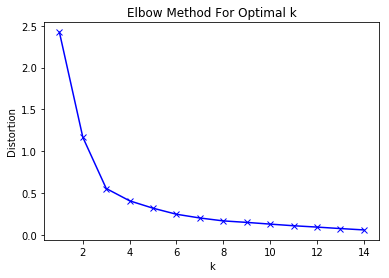

In [19]:
plt.plot(K, Distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# add clustering labels
city_merged.insert(6, 'Cluster Labels', kmeans.labels_)

city_merged.head()

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Herbs & Spices Store,High School,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Venue,National Park,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Steakhouse,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,New York City,40.712728,-74.006015,1.000000,1.000000,1.000000,2,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.01,0.01,0.00,0.00,0.01,0.00,0.0,0.03,0.00,0.00,0.0,0.0,0.01,0.00,0.00,0.01,0.00,0.0,0.00,0.04,0.0,0.00,0.0,0.00,0.00,0.01,0.01,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.02,0.01,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0.01,0.00

In [21]:
city_merged

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Herbs & Spices Store,High School,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Venue,National Park,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Steakhouse,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,New York City,40.712728,-74.006015,1.000000,1.000000,1.000000,2,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.0

In [22]:
# create map
map_clusters = folium.Map(location=[US_latitude, US_longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['latitude'], city_merged['longitude'], city_merged['City'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Evaluation

In [23]:
city_overview = cities_df.join(city_venues_sorted.set_index('City'), on='City')
city_overview.insert(6, 'Cluster Labels', kmeans.labels_)

In [24]:
city_overview.loc[city_overview['Cluster Labels'] == 0]

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Boston,42.360253,-71.058291,0.472611,0.025040,0.194777,0,Park,Bakery,Italian Restaurant,French Restaurant,Seafood Restaurant,Pizza Place,Hotel,Historic Site,Sandwich Place,Gastropub
2,San Francisco,37.779281,-122.419236,0.648726,0.050042,0.233820,0,Coffee Shop,Park,Grocery Store,Ice Cream Shop,Bakery,Bookstore,Sushi Restaurant,Pizza Place,Yoga Studio,Art Museum
3,Chicago,41.875562,-87.624421,0.376939,0.269724,0.346510,0,Hotel,New American Restaurant,Park,Theater,Italian Restaurant,Boat or Ferry,Coffee Shop,Sandwich Place,Seafood Restaurant,Diner
4,Seattle,47.603832,-122.330062,0.279448,0.033932,0.143082,0,Coffee Shop,Bakery,Sushi Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Sandwich Place,Vietnamese Restaurant,Bookstore,Middle Eastern Restaurant
6,Washington D.C.,38.895009,-77.036563,0.372726,0.027354,0.252259,0,Art Museum,Monument / Landmark,Hotel,History Museum,American Restaurant,Coffee Shop,Park,Science Museum,Ice Cream Shop,Theater
11,Philadelphia,39.952724,-75.163526,0.375694,0.133779,0.198737,0,Coffee Shop,Italian Restaurant,Wine Bar,Pizza Place,Vegetarian / Vegan Restaurant,Hotel,Park,Indian Restaurant,Steakhouse,Breakfast Spot
15,Miami,25.774266,-80.193659,0.446466,0.000000,0.135723,0,Hotel,Seafood Restaurant,Italian Restaurant,Coffee Shop,Park,Mexican Restaurant,Café,Bar,Lounge,Japanese Restaurant


In [25]:
city_overview.loc[city_overview['Cluster Labels'] == 1]

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Charlotte,35.227087,-80.843127,0.048554,0.048992,0.028161,1,American Restaurant,Brewery,Italian Restaurant,Deli / Bodega,Pizza Place,Park,Bakery,BBQ Joint,Grocery Store,Steakhouse
7,Columbus,39.962260,-83.000707,0.091745,0.049141,0.004406,1,Park,American Restaurant,Bar,Pizza Place,Coffee Shop,Café,Gastropub,Italian Restaurant,Bakery,Deli / Bodega
9,Atlanta,33.749099,-84.390185,0.080061,0.001166,0.161321,1,Trail,Park,American Restaurant,Mexican Restaurant,Italian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Pizza Place,Donut Shop,Mediterranean Restaurant
10,Kansas City,39.100105,-94.578142,0.000000,0.001155,0.001129,1,Coffee Shop,American Restaurant,Brewery,Italian Restaurant,History Museum,BBQ Joint,Music Venue,Pizza Place,Steakhouse,Breakfast Spot
12,Baltimore,39.290882,-76.610759,0.212794,0.012667,0.039587,1,Seafood Restaurant,Bar,Pizza Place,Coffee Shop,Italian Restaurant,American Restaurant,Park,Lounge,History Museum,Hotel
13,Dallas,32.776272,-96.796856,0.091266,0.109503,0.255727,1,Park,Coffee Shop,Hotel,Burger Joint,Mexican Restaurant,Pizza Place,Dive Bar,Theater,Art Museum,Brewery
14,Houston,29.758938,-95.367697,0.078242,0.230318,0.227130,1,Beer Garden,Pizza Place,Coffee Shop,Park,Café,Mexican Restaurant,Grocery Store,Trail,Italian Restaurant,Vietnamese Restaurant
16,Phoenix,33.448587,-112.077346,0.063398,0.150396,0.071551,1,Pizza Place,Theater,Hotel,Café,Grocery Store,Sandwich Place,Breakfast Spot,Bar,Coffee Shop,Mexican Restaurant
17,Portland,45.520247,-122.674195,0.126125,0.021686,0.026740,1,Coffee Shop,Park,Brewery,Sandwich Place,Hotel,French Restaurant,Bookstore,Food Truck,Dessert Shop,Pub
18,San Antonio,29.424600,-98.495141,0.066845,0.132463,0.000000,1,Hotel,Mexican Restaurant,Burger Joint,Coffee Shop,Beer Garden,Lounge,Brewery,American Restaurant,Museum,Cocktail Bar


In [26]:
city_overview.loc[city_overview['Cluster Labels'] == 2]

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York City,40.712728,-74.006015,1.0,1.0,1.0,2,Park,Italian Restaurant,Bookstore,Seafood Restaurant,Ice Cream Shop,Bakery,Scenic Lookout,Cheese Shop,Cycle Studio,Fish Market


In [27]:
city_overview.loc[city_overview['Cluster Labels'] == 3]

,City,latitude,longitude,density,population,GDP (mn),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Los Angeles,34.053691,-118.242767,0.261348,0.439748,0.575692,3,Sandwich Place,Coffee Shop,Ice Cream Shop,Mexican Restaurant,Theater,Italian Restaurant,Taco Place,Korean Restaurant,Park,Art Gallery
